# 1 Monte Carlo Simulation

## 1.1 Data Creation and Simulation

To draw from the given likelihoods using the standard uniform distribution
$U$ and inverse transform sampling, we first need to calculate the 
respective CDFs $F_{X|Y}$:

$$
\begin{aligned}
p(X|Y=0)&=2-2x \\\\ \Rightarrow
F_{X|Y=0}(x)&=\int\limits_{0}^x p(t|Y=0) dt = 2x-x^2 \\\\
p(X|Y=1)&=2x \\\\ \Rightarrow
F_{X|Y=1}(x)&=\int\limits_{0}^x p(t|Y=1) dt = x^2
\end{aligned}
$$

We can then use the inverse of the CDFs as transformations from $U$ to
$p(X|Y=y_0)$:

$$
\begin{aligned}
F_{X|Y=0}^{-1}(x)&= 1-\sqrt{1-u} \\\\
F_{X|Y=1}^{-1}(u)&= \sqrt{u}
\end{aligned}
$$

where in the first line we only have to consider the case of the negative
root since $x \in [0,1)$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import itertools
import scipy.stats as stats

from IPython.display import display
from vdom.helpers import h3, h4, p, b, div

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

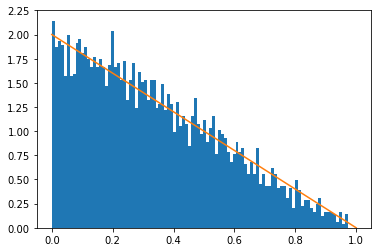

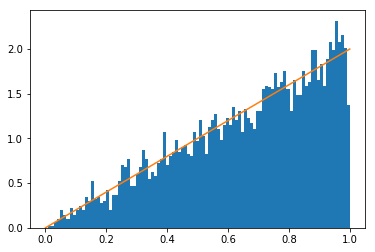

In [2]:
transforms = [
    lambda u: 1 - np.sqrt(1-u),
    lambda u: np.sqrt(u)
]
def create_data(N):
    Y = np.random.randint(2, size=N)
    X = np.fromiter(
        (transforms[y](np.random.random_sample()) for y in Y),
        np.float64
    )
    return X, Y

features, labels = create_data(10000)
x = np.arange(0,1,0.0001)

plt.hist(features[labels == 0], bins=100, density=True)
plt.plot(x, 2-2*x)
plt.show()

plt.hist(features[labels == 1], bins=100, density=True)
plt.plot(x, 2*x)
plt.show()

## 1.2 Classification by Thresholding

In [3]:
def f_a(data, t):
    return (data > t).astype(int)

def f_b(data, t):
    return (data <= t).astype(int)

def error_rate(m, t, classifier, *args):
    features, labels = create_data(m)
    prediction = classifier(features, t)
    return (labels != prediction).sum()/m

M = [10, 100, 1000, 10000]
T = [0.2, 0.5, 0.6]

errors = np.fromiter(
    itertools.starmap(error_rate,
                    itertools.product(M, T, (f_a, f_b), range(10))),
    np.float64
)

errors.shape = len(M), len(T), 2, 10
error_means = errors.mean(axis=3)
error_std = errors.std(axis=3)

error_a, error_b = map(np.squeeze, np.split(error_means, 2, axis=2))
std_a, std_b = map(np.squeeze, np.split(error_std, 2, axis=2))

display(
    h3('Rule a'),
    h4('Means'),
    pd.DataFrame(error_a, index=M, columns=T),
    h4('STD'),
    pd.DataFrame(std_a, index=M, columns=T),
    h3('Rule b'),
    h4('Means'),
    pd.DataFrame(error_b, index=M, columns=T),
    h4('STD'),
    pd.DataFrame(std_b, index=M, columns=T)
)

<h3 />

<h4 />

0.2      0.5      0.6
10     0.39000  0.23000  0.31000
100    0.33900  0.26200  0.25900
1000   0.33070  0.25480  0.26410
10000  0.33961  0.24897  0.25901

<h4 />

0.2       0.5       0.6
10     0.104403  0.110000  0.170000
100    0.029138  0.037630  0.050488
1000   0.014684  0.010147  0.010300
10000  0.004584  0.004755  0.002779

<h3 />

<h4 />

0.2      0.5      0.6
10     0.66000  0.77000  0.71000
100    0.63500  0.75900  0.73000
1000   0.65700  0.74640  0.74020
10000  0.65871  0.75064  0.74126

<h4 />

0.2       0.5       0.6
10     0.111355  0.161555  0.113578
100    0.046957  0.029138  0.046904
1000   0.007603  0.014347  0.011957
10000  0.003357  0.004207  0.004229

In the tables above, one can see the mean error rates and standard
derivations of the classifier. Each column corresponds to one value
for $t$, each row corresponds to one value for $M$.

As one can see, the error rates for $t=0.5$ with Rule A have the expected
values.

One can further note, that the standard derivation decreases dramatically
for growing $M$.

## 1.3 Nearest Neighbor Classification

In [4]:
def nn(x, x0, x1):
    t = (x0 + x1)/2
    return f_a(x, t) if x0 < x1 else f_b(x, t)

def error_rate():
    x0 = transforms[0](np.random.random_sample())
    x1 = transforms[1](np.random.random_sample())
    N = 10000
    features, labels = create_data(N)
    prediction = nn(features, x0, x1)
    return (labels != prediction).sum()/N

errors = np.fromiter(
    (error_rate() for i in range(100)),
    np.float64
)

display(
    p(b('Average error: '), str(errors.mean()))
)

<p />